In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D

# Least-squares via row-reduction

In [2]:
m = 10
n = 3

# create data
X = np.random.randn(m,n)     # "design matrix"
y = np.random.randn(m,1)     # "outcome measures (data)"

np.shape(y)

(10, 1)

In [3]:
# directly applying RREF
Xy = Matrix( np.concatenate([X,y],axis=1))
print(Xy.rref())

(Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]]), (0, 1, 2, 3))


In [4]:
# now reapply to the normal equations
XtX = X.T@X
Xty = X.T@y
normEQ = Matrix(np.concatenate([XtX,Xty],axis=1))

Xsol = normEQ.rref()
Xsol = Xsol[0]
beta = Xsol[:,-1]

print(np.array(Xsol)), print(' ')
print(beta), print(' ')

# compare to left-inverse
beta2 = np.linalg.inv(XtX) @ Xty
print(beta2), print(' ')

# and with the python solver
beta3 = np.linalg.solve(XtX,Xty)
print(beta3)

[[1 0 0 0.157139872738215]
 [0 1 0 0.219423656693613]
 [0 0 1 -0.0630191513803092]]
 
Matrix([[0.157139872738215], [0.219423656693613], [-0.0630191513803092]])
 
[[ 0.15713987]
 [ 0.21942366]
 [-0.06301915]]
 
[[ 0.15713987]
 [ 0.21942366]
 [-0.06301915]]


# Least-squares example 1

In [5]:
# data
data = np.array([[-4,0,-3,1,2,8,5,8]]).T
N    = len(data)

# design matrix
X = np.ones([N,1])
# fit the model
b = np.linalg.solve(X.T@X,X.T@data)

# compare against the mean
m = np.mean(data)

# print the results
print(b,m)

[[2.125]] 2.125


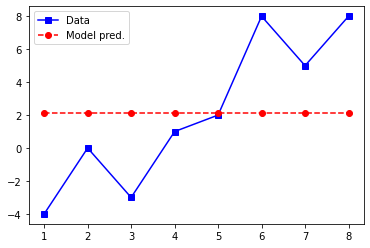

In [6]:
# compute the model-predicted values
yHat = X@b

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()

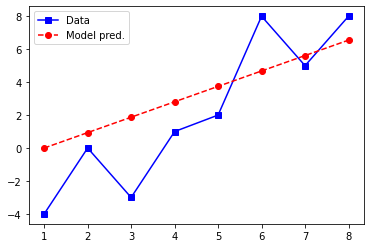

In [7]:
# new design matrix
X = np.array([np.arange(0,N)]).T

# fit the model
b = np.linalg.solve(X.T@X,X.T@data)

# compute the model-predicted values
yHat = X@b

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()

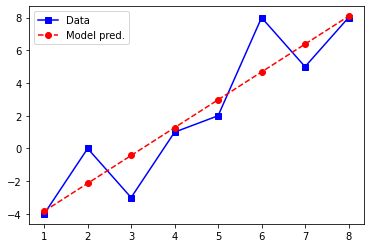

In [8]:
# design matrix
X = np.concatenate([np.ones([N,1]),np.array([np.arange(0,N)]).T],axis=1)
# fit the model
b = np.linalg.solve(X.T@X,X.T@data)

# compute the model-predicted values
yHat = X@b

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()

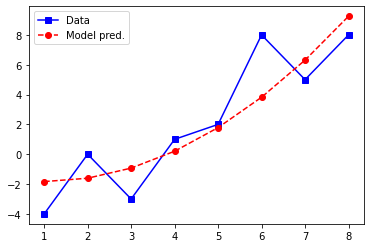

In [9]:
## now with nonlinearity in the design matrix

# design matrix
X = np.concatenate([np.ones([N,1]),np.array([np.arange(0,N)**2]).T],axis=1)
# fit the model
b = np.linalg.solve(X.T@X,X.T@data)

# compute the model-predicted values
yHat = X@b

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()

In [10]:
# Code Practice: Least squares via QR decomposition
m = 10
n = 3

X = np.random.randn(m,n)
y = np.random.randn(m,1)

# QR decomposition
Q, R = np.linalg.qr(X)
beta1 = np.linalg.solve(R.T@R, (Q@R).T@y)

# compare against standard left inverse method
beta2 = np.linalg.solve(X.T@X, X.T@y)
brta2 = np.linalg.lstsq(X,y,rcond=None)[0]

print(beta1)
print()
print(beta2)

[[ 0.23591799]
 [-0.11227925]
 [-0.0082707 ]]

[[ 0.23591799]
 [-0.11227925]
 [-0.0082707 ]]
